In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Part 1: Linear regression

We are aiming to use linear regression to create a prediction model for housing prices in Taiwan using the dataset: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

We aim to create a model with the target variable being the price and the feature being time of purchase

First we import our housing data and check it out: 

The data is in good condition with no missing values so we may get to work.

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets



X_axis=pd.DataFrame(X['X1 transaction date'])

X.head()
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


### Plotting
First we plot our data below in a scatter plot, with the x-axis being the Transaction date and the y-axis being the housing price

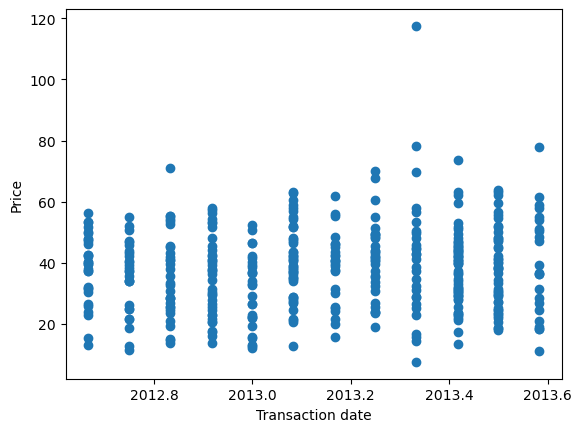

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X_axis, y)
plt.xlabel('Transaction date')
plt.ylabel('Price')
plt.show()

### Fitting
Then we fit our linear regression model:

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_axis, y)

LinearRegression()

In [8]:

b0 = model.intercept_ # note the underscore!
b1 = model.coef_[0] # returns a list containing a single element
print("Intercept: %.2f" % b0 + ", Coefficient: %.4f" % b1)


Intercept: -8461.35, Coefficient: 4.2219


C:\Users\grummar\AppData\Local\Temp\ipykernel_1068\3077819042.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept: %.2f" % b0 + ", Coefficient: %.4f" % b1)


We use our intercept and coefficient to plot our linear regression over the scatter plot

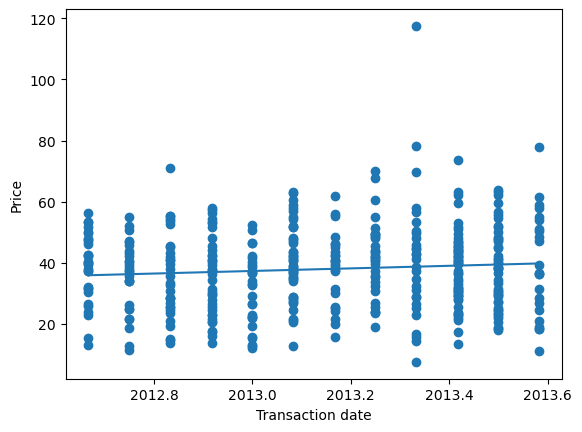

In [10]:
xs = np.linspace(X_axis.min(), X_axis.max())
ys = b0 + b1 * xs
plt.plot(xs, ys)
plt.scatter(X_axis, y)
plt.xlabel('Transaction date')
plt.ylabel('Price')
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_axis)

print("Mean absolute error: %.2f" % mean_absolute_error(y, preds))

Mean absolute error: 10.73


### Results

Our linear regression model gives a mean absolute error of 10.73 * 10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared.

We can see that there is a slight trend for housing prices to increase as a function of time. However our model is not very useful for predicting the price of any single housing unit, since there is a large variance in the target variable.

## Part 2: Logistical regression

Our goal is to create and fit a logistical regression model to predict whether the a given apartment falls under or over the mean price for the area.

### Preparing the data:

We use the same dataset(https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set) we used in part 1.

First we calculate the mean and convert our target variable to a binary integer result on the basis of whether or not the housing price is under or over the mean.

In [14]:
ymean = y.values.mean()
print(ymean)
ytarget = y

37.980193236714975


In [15]:
ytarget['Y house price of unit area'].values[y['Y house price of unit area'].values <= ymean] = 0
ytarget['Y house price of unit area'].values[y['Y house price of unit area'].values > ymean] = 1
ytarget['Y house price of unit area'].astype('int64')




0      0
1      1
2      1
3      1
4      1
      ..
409    0
410    1
411    1
412    1
413    1
Name: Y house price of unit area, Length: 414, dtype: int64

We change our feature datatypes all to float64 and scale them.

In [17]:
from sklearn.preprocessing import StandardScaler
X['X4 number of convenience stores'].astype('float64')
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)
y = ytarget
y['Y house price of unit area'].astype('int64')
y=np.ravel(y)

## Fitting

We build our logistical regression model:

It is important to note that for real research projects we should use different data for fitting and for our actual results, but since this is an exercise we will use this simplified model

In [19]:
# build and fit model
reg = LogisticRegression(solver='lbfgs')
reg.fit(X,y)


print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[ 0.30499188 -0.6521808  -2.3880496   0.62862116  0.96306763  0.07518563]]
Intercept:  [-0.66578747]


## Accuracy
We test the accuracy of our model by calculating an accuracy score using the scikit metrics accuracy_score and by visualizing a confusion matrix:

Accuracy: 0.83
Confusion Matrix:
 [[153  47]
 [ 25 189]]


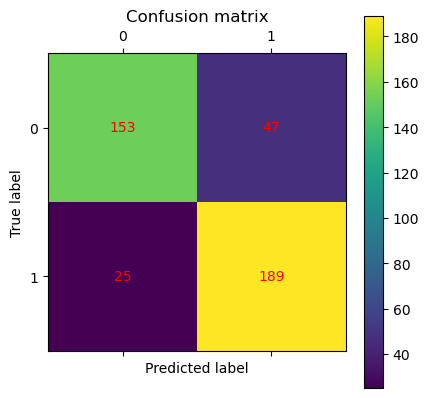

In [21]:

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=10)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Our logistical regression model seems fairly accurate, reaching an accuracy of 0.83 using our test data.